# Project: Investigate The Movie Database (TMDb) Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#rq1">Research Question 1 - Do movie stars move to bigger budget films as their career progresses?</a></li>
<li><a href="#rq2">Research Question 2 - Is the TMDb popularity linked to the revenue taken by the film?</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

I have chose to investigate the TMDb (The Movie Database) dataset, as this is the one which I have the most previous knowledge and interest in. The database includes information on over 10,000 movies, including details such as the cast and the budget.

This Jupyter notebook was created with **python version 2.7.15**.

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

First of all I will load the csv (Comma Separated Values) dataset into pandas, before looking at the start and end of the dataset.

### General Properties

In [2]:
tmdb = pd.read_csv("tmdb-movies.csv")       #load data
tmdb.head                                   #output the start and end of the data

<bound method DataFrame.head of            id    imdb_id  popularity     budget     revenue  \
0      135397  tt0369610   32.985763  150000000  1513528810   
1       76341  tt1392190   28.419936  150000000   378436354   
2      262500  tt2908446   13.112507  110000000   295238201   
3      140607  tt2488496   11.173104  200000000  2068178225   
4      168259  tt2820852    9.335014  190000000  1506249360   
5      281957  tt1663202    9.110700  135000000   532950503   
6       87101  tt1340138    8.654359  155000000   440603537   
7      286217  tt3659388    7.667400  108000000   595380321   
8      211672  tt2293640    7.404165   74000000  1156730962   
9      150540  tt2096673    6.326804  175000000   853708609   
10     206647  tt2379713    6.200282  245000000   880674609   
11      76757  tt1617661    6.189369  176000003   183987723   
12     264660  tt0470752    6.118847   15000000    36869414   
13     257344  tt2120120    5.984995   88000000   243637091   
14      99861  tt239542

Looking at the start and end of the data, it can be seen that the budget and revenue data is missing for older films, but as this data may be usefull, it is worth keeping the data series.
The homepage, tagline, keywords and overview columns are long columns which are unlikely to provide usable data, so I plan to drop these to make the table easier to read. I am also unlikely to use the imdb_id column, so this will also be dropped. I will also output the first row of data to see a clearer samle of the headings and respective data.

>Note - Only run this cell once, otherwise you will get an error as it tries to delete the columns again.
### Data Cleaning

In [3]:
del tmdb['homepage']                        #only run this cell once
del tmdb['tagline']
del tmdb['keywords']
del tmdb['overview']
del tmdb['imdb_id']

In [4]:
print tmdb.iloc[0]                          #print column names and first row (0)

id                                                                 135397
popularity                                                        32.9858
budget                                                          150000000
revenue                                                        1513528810
original_title                                             Jurassic World
cast                    Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...
director                                                  Colin Trevorrow
runtime                                                               124
genres                          Action|Adventure|Science Fiction|Thriller
production_companies    Universal Studios|Amblin Entertainment|Legenda...
release_date                                                       6/9/15
vote_count                                                           5562
vote_average                                                          6.5
release_year                          

The cast, genres and production_companies look like interesting datasets to probe, so I am going to add total counts of the data in these columns to 3 new columns.
First of all I need to check for any empty series, as I will be adding 1 to the count of '|' characters, which will only be present when there is more that one item.


In [5]:
print 'Cast length:', len(tmdb['cast'])
print 'Genres length:', len(tmdb['genres'])
print 'Production companies length:', len(tmdb['production_companies'])

Cast length: 10866
Genres length: 10866
Production companies length: 10866


Then I count the separators and add one column to the dataset for the count of items in each series.

>Note - Only run this cell once, otherwise you will get an error as it tries to create the columns again.

In [6]:
tmdb['cast_count'] = (tmdb['cast'].str.count('\|')) + 1    #only run this cell once
tmdb['genre_count'] = (tmdb['genres'].str.count('\|')) + 1
tmdb['companies_count'] = (tmdb['production_companies'].str.count('\|')) + 1

Again print the first datapoint and the data types statistics for the dataset.

In [7]:
print tmdb.iloc[0]
print tmdb.dtypes

id                                                                 135397
popularity                                                        32.9858
budget                                                          150000000
revenue                                                        1513528810
original_title                                             Jurassic World
cast                    Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...
director                                                  Colin Trevorrow
runtime                                                               124
genres                          Action|Adventure|Science Fiction|Thriller
production_companies    Universal Studios|Amblin Entertainment|Legenda...
release_date                                                       6/9/15
vote_count                                                           5562
vote_average                                                          6.5
release_year                          

Now change the data types in the data frame, to their respective data types - integers, floats and dates.


In [8]:
def parse_maybe_int(i):
    if i == '':
        return None
    else:
        return int(i)

tmdb['budget_adj'] = tmdb['budget_adj'].apply(parse_maybe_int)
tmdb['revenue_adj'] = tmdb['revenue_adj'].apply(parse_maybe_int)

print tmdb['budget_adj'].head
print tmdb['revenue_adj'].head

<bound method Series.head of 0        137999939
1        137999939
2        101199955
3        183999919
4        174799923
5        124199945
6        142599937
7         99359956
8         68079970
9        160999929
10       225399900
11       161919931
12        13799993
13        80959964
14       257599886
15        40479982
16        44159980
17       119599947
18        87399961
19       147199935
20       174799923
21        27599987
22       101199955
23        36799983
24        25759988
25       137999939
26        62559972
27        74519967
28        18399991
29        56119975
           ...    
10836            0
10837            0
10838            0
10839            0
10840            0
10841       503851
10842            0
10843            0
10844            0
10845            0
10846            0
10847            0
10848     34362645
10849            0
10850            0
10851            0
10852            0
10853            0
10854            0
10855      4702610
10

Note the dates are in US format - months/days/years

Default 2digit dates in python for 19xx are from 1969, so we will need to change the dates before 1969, from 2066, 2067 & 2068 to 1966, 1967 & 1968 respectively. As the dates are in the range 1966 to 2015, I know all dates after 2015 should infact begin with 19xx, so I will subtract 100 years off of all dates with a year greater than today (2018).

In [9]:
def parse_date(date):
    if date == '':
        return None
    else:
        return dt.datetime.strptime(date, '%m/%d/%y')
    
def parse_pre69(date1):
    if date1.year > 2018:
        return date1.replace(year=date1.year-100)
    else:
        return date1

tmdb['release_date'] = tmdb['release_date'].apply(parse_date)
tmdb['release_date'] = tmdb['release_date'].apply(parse_pre69)

print tmdb['release_date'].head
print tmdb['release_year'].head

<bound method Series.head of 0       2015-06-09
1       2015-05-13
2       2015-03-18
3       2015-12-15
4       2015-04-01
5       2015-12-25
6       2015-06-23
7       2015-09-30
8       2015-06-17
9       2015-06-09
10      2015-10-26
11      2015-02-04
12      2015-01-21
13      2015-07-16
14      2015-04-22
15      2015-12-25
16      2015-01-01
17      2015-07-14
18      2015-03-12
19      2015-11-18
20      2015-05-19
21      2015-06-15
22      2015-05-27
23      2015-02-11
24      2015-12-11
25      2015-07-23
26      2015-06-25
27      2015-01-24
28      2015-11-06
29      2015-09-09
           ...    
10836   1966-01-01
10837   1966-06-21
10838   1966-11-01
10839   1966-10-27
10840   1966-12-22
10841   1966-10-23
10842   1966-01-01
10843   1966-06-09
10844   1966-01-16
10845   1966-03-01
10846   1966-01-09
10847   1966-06-20
10848   1966-08-24
10849   1966-12-16
10850   1966-02-23
10851   1966-06-22
10852   1966-05-31
10853   1966-03-29
10854   1966-02-17
10855   1966-01-20
10

I then sorted the dataset in date format, before then displaying the start and end of the datset, to ensure that I parsed all of the dates correctly.

In [10]:
tmdb = tmdb.sort_values(by=['release_date'], ascending=True)
print tmdb.head 

<bound method DataFrame.head of            id  popularity     budget     revenue  \
10150    6643    0.421043          0           0   
10152   23220    0.333643          0           0   
10162   18780    0.194948          0           0   
10166   21240    0.136525          0           0   
10156    1673    0.267118          0           0   
10172    1941    0.256779          0           0   
10147   11167    0.569424          0           0   
10155   43040    0.269428          0           0   
10158   31102    0.254124          0           0   
10144     284    0.947307    3000000    25000000   
10165   22013    0.138777          0           0   
10153   23439    0.323180     270000           0   
10163    1908    0.162753          0           0   
10167   11773    0.127219     200000           0   
10164    2982    0.144106          0           0   
10168   15788    0.114188          0    10000000   
10169   29756    0.110511          0           0   
10149     299    0.423531       

Finally I use the pandas .describe function, to see the statistics of the data in each of the columns.

In [11]:
tmdb.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,cast_count,genre_count,companies_count
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10790.000000,10843.000000,9836.000000
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07,4.872382,2.486397,2.361427
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08,0.584604,1.115649,1.343804
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00,1.000000,1.000000,1.000000
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00,5.000000,2.000000,1.000000
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00,5.000000,2.000000,2.000000
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07,5.000000,3.000000,3.000000
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09,5.000000,5.000000,5.000000


<a id='eda'></a>
## Exploratory Data Analysis

<a id='rq1'></a>
### Research Question 1 - Do movie stars move to bigger budget films as their career progresses?

As movie stars progress in their career, they normally take on more major parts in big films. I plan to see if there is an increase in the budget of the films over the top 20 stars careers. With the number of actors for each film restrcted to 5, parts of an actors career will not show in the statistics. I will need to compare this first to the inflation adjusted budget of the film, and then also the takings of the film, as a high takings to budget ratio may show when an actor has made the film more money, which then enabled then to claim a higher wage.

First of all I will separate all of the actors out into a separate data frame, before then combining into a single list, to see who the top 20 actors are.

In [12]:
actorsdf = tmdb['cast'].str.split('|', expand=True).rename(columns = lambda x:"actor"+str(x+1))
#lambda x: "string"+str(x+1)
print 'Actors from oldest film:', actorsdf.iloc[0]
print 'Start and end of Actors dataframe:', actorsdf.head

Actors from oldest film: actor1    Burt Lancaster
actor2    Audrey Hepburn
actor3      Audie Murphy
actor4        John Saxon
actor5      Lillian Gish
Name: 10150, dtype: object
Start and end of Actors dataframe: <bound method DataFrame.head of                      actor1              actor2                actor3  \
10150        Burt Lancaster      Audrey Hepburn          Audie Murphy   
10152         Peter Cushing        Martita Hunt        Yvonne Monlaur   
10162          Kenneth More         Dana Wynter          Carl MÃ¶hner   
10166        Kenneth Connor     Charles Hawtrey             Sid James   
10156        Randolph Scott         Nancy Gates          Skip Homeier   
10172           Paul Newman     Eva Marie Saint           Lee J. Cobb   
10147       Karlheinz BÃ¶hm       Moira Shearer           Anna Massey   
10155        Jeffrey Hunter        Woody Strode      Constance Towers   
10158          Hayley Mills          Jane Wyman          Richard Egan   
10144           Jack Lemmo

In [13]:
single_list = pd.concat([actorsdf['actor1'],actorsdf['actor2'],actorsdf['actor3'],actorsdf['actor4'],actorsdf['actor5']], ignore_index=True)
print 'Single list length:', len(single_list)
print 'Start and end of single list:', single_list.head

Single list length: 54330
Start and end of single list: <bound method Series.head of 0          Burt Lancaster
1           Peter Cushing
2            Kenneth More
3          Kenneth Connor
4          Randolph Scott
5             Paul Newman
6         Karlheinz BÃ¶hm
7          Jeffrey Hunter
8            Hayley Mills
9             Jack Lemmon
10         Burt Lancaster
11          Vincent Price
12          Spencer Tracy
13         George Sanders
14         Michael Rennie
15            Jerry Lewis
16        Charles Herbert
17          Frank Sinatra
18        Anthony Perkins
19             Rod Taylor
20          Albert Finney
21        Christopher Lee
22          Jackie Joseph
23           Kirk Douglas
24         Marilyn Monroe
25              Doris Day
26            Yul Brynner
27             John Wayne
28            Jerry Lewis
29          Elvis Presley
               ...       
54300        Michael Cera
54301     Douglas Rankine
54302       Doris Roberts
54303          Tony Perez
54304

Then I will create a list with the total count of each actor appearing in the dataset.

In [14]:
sorted_list = single_list.value_counts()
sorted_list = sorted_list.rename_axis('Actor').reset_index(name='Count')
print 'Actors list length:', len(sorted_list)
print 'Start and end of Top Actors:', sorted_list.head

Actors list length: 19026
Start and end of Top Actors: <bound method DataFrame.head of                       Actor  Count
0            Robert De Niro     72
1         Samuel L. Jackson     71
2              Bruce Willis     62
3              Nicolas Cage     61
4             Michael Caine     53
5            Robin Williams     51
6               John Cusack     50
7            Morgan Freeman     49
8              John Goodman     49
9               Liam Neeson     48
10           Susan Sarandon     48
11           Julianne Moore     47
12             Alec Baldwin     47
13       Christopher Walken     46
14                Tom Hanks     46
15              Johnny Depp     46
16             Gene Hackman     46
17       Sylvester Stallone     45
18             Willem Dafoe     45
19             Dennis Quaid     45
20        Donald Sutherland     44
21           Clint Eastwood     44
22             Meryl Streep     44
23                Ed Harris     44
24            Ewan McGregor     43
25 

Then I will plot this list as a histogram to see if there is a good spread of data.

Text(0.5,1,'Actors vs Film Count')

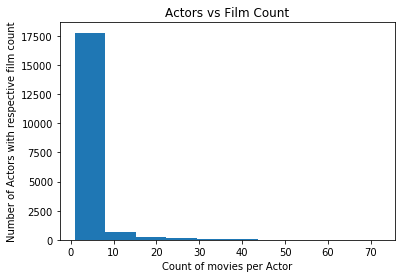

In [15]:
plt.hist(sorted_list['Count'])
plt.xlabel('Count of movies per Actor')
plt.ylabel('Number of Actors with respective film count')
plt.title('Actors vs Film Count')

As the majority of actors have appeared in less than 10 films (as a top 5 actor), I will create a shorter list containing just the top 20 actors, so that I the most data for each actor to compare against one another.
I will also plot another histogram for these top 20 actors.

                 Actor  Count
0       Robert De Niro     72
1    Samuel L. Jackson     71
2         Bruce Willis     62
3         Nicolas Cage     61
4        Michael Caine     53
5       Robin Williams     51
6          John Cusack     50
7       Morgan Freeman     49
8         John Goodman     49
9          Liam Neeson     48
10      Susan Sarandon     48
11      Julianne Moore     47
12        Alec Baldwin     47
13  Christopher Walken     46
14           Tom Hanks     46
15         Johnny Depp     46
16        Gene Hackman     46
17  Sylvester Stallone     45
18        Willem Dafoe     45
19        Dennis Quaid     45


Text(0.5,1,'Actors vs Film Count')

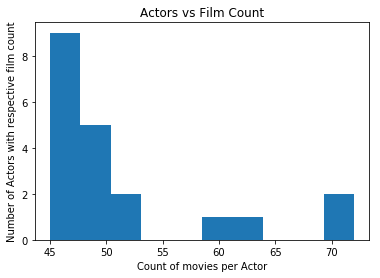

In [16]:
short_list = sorted_list.head(20)
print short_list
plt.hist(short_list['Count'])
plt.xlabel('Count of movies per Actor')
plt.ylabel('Number of Actors with respective film count')
plt.title('Actors vs Film Count')

Now that I have a useable Actor dataset, I can analyse the main TMDb dataset, and graph the out put.

I have defined two routines for creating the graphs, one to filter out the small and zero values I was seeing for the inflation adjusted budget, and the second to extract the data to graph for just one Actor.

In [17]:
def parse_budget(budget):
    if budget > 100:
        return budget

def top20_graph(i):
    g = 'g'+str(i)
    g = tmdb[tmdb['cast'].str.contains(short_list['Actor'].iloc[i])==True]
    del g['id']
    del g['popularity']
    del g['budget']
    del g['revenue']
    del g['director']
    del g['runtime']
    del g['genres']
    del g['production_companies']
    del g['vote_count']
    del g['vote_average']
    del g['release_year']
    del g['cast_count']
    del g['genre_count']
    del g['companies_count']
    del g['cast']
    del g['revenue_adj']
    del g['original_title']
    g = g.set_index(['release_date'])
    g = g['budget_adj'].apply(parse_budget)
    g = g.dropna()
    print 'Graph for Actor:', short_list['Actor'].iloc[i]
    print 'Top Actor Number:', i+1
    print 'Was a top 5 Actor in:', short_list['Count'].iloc[i], 'films'
    print 'Number of plotted films:', len(g)
    plt.plot(g, 'ro')
    plt.xlabel('Date (Year)')
    plt.ylabel('Inflation Adjusted Revenue')
    plt.title(short_list['Actor'].iloc[i])

I then created graphs for the Top 20 Actors.

Graph for Actor: Robert De Niro
Top Actor Number: 1
Was a top 5 Actor in: 72 films
Number of plotted films: 58


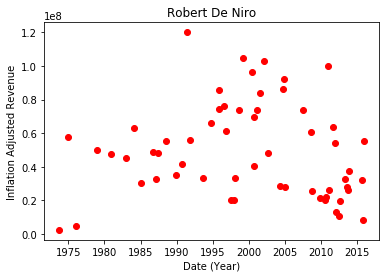

In [18]:
top20_graph(0)

Graph for Actor: Samuel L. Jackson
Top Actor Number: 2
Was a top 5 Actor in: 71 films
Number of plotted films: 52


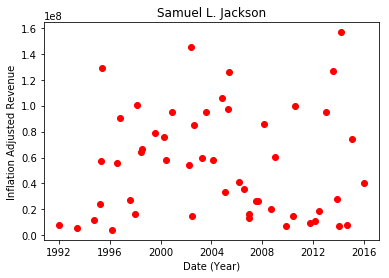

In [19]:
top20_graph(1)

Graph for Actor: Bruce Willis
Top Actor Number: 3
Was a top 5 Actor in: 62 films
Number of plotted films: 56


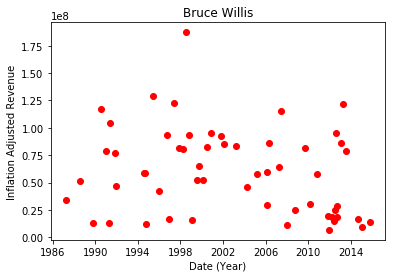

In [20]:
top20_graph(2)

Graph for Actor: Nicolas Cage
Top Actor Number: 4
Was a top 5 Actor in: 61 films
Number of plotted films: 53


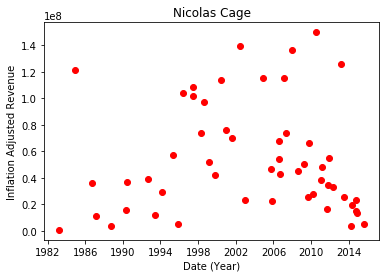

In [21]:
top20_graph(3)

Graph for Actor: Michael Caine
Top Actor Number: 5
Was a top 5 Actor in: 53 films
Number of plotted films: 28


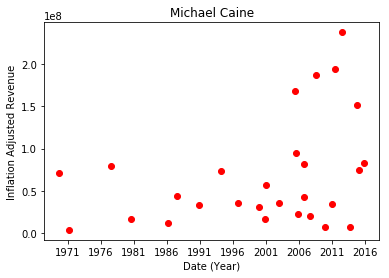

In [22]:
top20_graph(4)

Graph for Actor: Robin Williams
Top Actor Number: 6
Was a top 5 Actor in: 51 films
Number of plotted films: 33


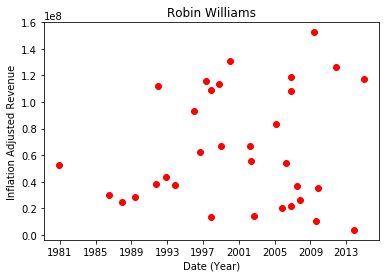

In [23]:
top20_graph(5)

Graph for Actor: John Cusack
Top Actor Number: 7
Was a top 5 Actor in: 50 films
Number of plotted films: 26


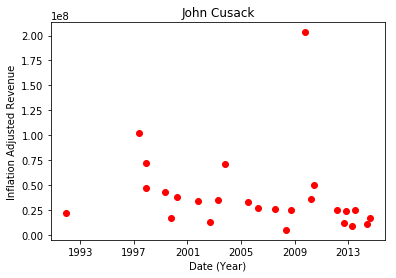

In [24]:
top20_graph(6)

Graph for Actor: Morgan Freeman
Top Actor Number: 8
Was a top 5 Actor in: 49 films
Number of plotted films: 37


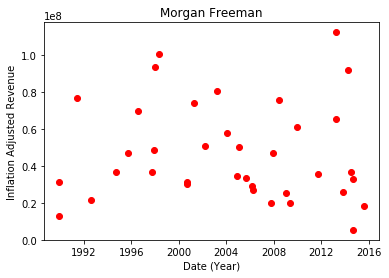

In [25]:
top20_graph(7)

Graph for Actor: John Goodman
Top Actor Number: 9
Was a top 5 Actor in: 49 films
Number of plotted films: 30


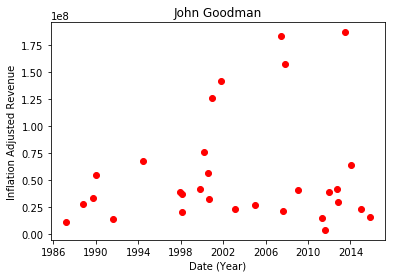

In [26]:
top20_graph(8)

Graph for Actor: Liam Neeson
Top Actor Number: 10
Was a top 5 Actor in: 48 films
Number of plotted films: 33


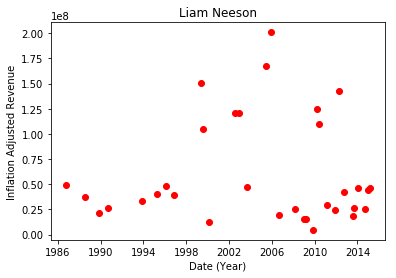

In [27]:
top20_graph(9)

Unfortunately I could not see a corellation between the budget of a film increasing as a movie stars career progresses.
If the data had been available, this may have shown for actors at the start of their career, before they were mentioned in the top 5 actors.

<a id='rq2'></a>
### Research Question 2 - Is the TMDb popularity linked to the revenue taken by the film?

I then wanted to see if the TMDb popularity was linked to the revenue taken by the film. I wanted to graph the inflation adjusted revenue against the average vote, however if this did not show a corellation, I could also look at the vote count and popularity data series.
First I reminded myself of the first data point in my dataset.

In [28]:
print tmdb.iloc[0]

id                                                                   6643
popularity                                                       0.421043
budget                                                                  0
revenue                                                                 0
original_title                                             The Unforgiven
cast                    Burt Lancaster|Audrey Hepburn|Audie Murphy|Joh...
director                                                      John Huston
runtime                                                               125
genres                                               Action|Drama|Western
production_companies                                    James Productions
release_date                                          1960-01-01 00:00:00
vote_count                                                             17
vote_average                                                          4.9
release_year                          

I then created a new dataset where the value of the adjusted budget was at least 100, in order to remove any erroneous data points, before returning the size of the new dataset.

In [29]:
rev = tmdb[tmdb['revenue_adj']>100]
print len(rev)

4814


I then again called up the first data point to ensure that the first data point with 0 for adjusted budget had been removed.

In [30]:
print rev.iloc[0]

id                                                                    284
popularity                                                       0.947307
budget                                                            3000000
revenue                                                          25000000
original_title                                              The Apartment
cast                    Jack Lemmon|Shirley MacLaine|Fred MacMurray|Ra...
director                                                     Billy Wilder
runtime                                                               125
genres                                               Comedy|Drama|Romance
production_companies                   United Artists|The Mirisch Company
release_date                                          1960-06-15 00:00:00
vote_count                                                            235
vote_average                                                          7.9
release_year                          

I then separated out the data series I wanted to graph, along with the backup data series', before plotting the inflation adjusted revenue against the average vote.

Text(0.5,1,'Revenue plotted against the average TMDb vote')

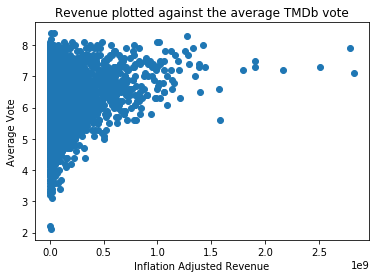

In [31]:
ra = rev['revenue_adj']
va = rev['vote_average']
vc = rev['vote_count']
po = rev['popularity']

plt.scatter(ra,va)
plt.xlabel('Inflation Adjusted Revenue')
plt.ylabel('Average Vote')
plt.title('Revenue plotted against the average TMDb vote')

Whilst there was a positive skew showing that films with a larger budget tend to have a larger vote, I wanted to see if I had a better result off plotting the other data series, so I also plotted these.

Text(0.5,1,'Revenue plotted against the count of TMDb votes')

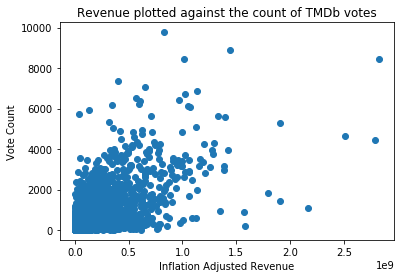

In [32]:
plt.scatter(ra,vc)
plt.xlabel('Inflation Adjusted Revenue')
plt.ylabel('Vote Count')
plt.title('Revenue plotted against the count of TMDb votes')

Text(0.5,1,'The average TMDb vote against the count of TMDb votes')

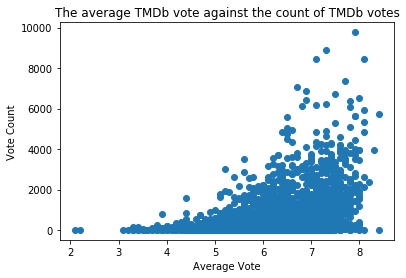

In [33]:
plt.scatter(va,vc)
plt.xlabel('Average Vote')
plt.ylabel('Vote Count')
plt.title('The average TMDb vote against the count of TMDb votes')

Text(0.5,1,'Revenue plotted against the TMDb popularity')

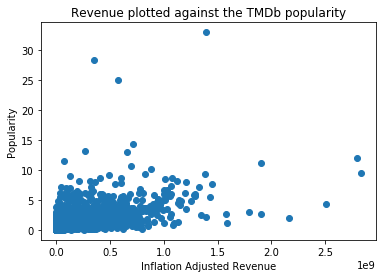

In [34]:
plt.scatter(ra,po)
plt.xlabel('Inflation Adjusted Revenue')
plt.ylabel('Popularity')
plt.title('Revenue plotted against the TMDb popularity')

Text(0.5,1,'Average vote against the TMDb popularity')

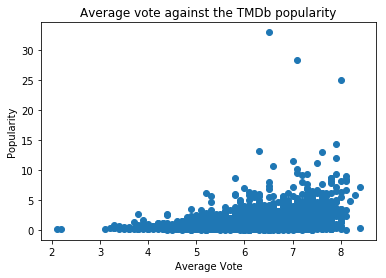

In [35]:
plt.scatter(va,po)
plt.xlabel('Average Vote')
plt.ylabel('Popularity')
plt.title('Average vote against the TMDb popularity')

<a id='conclusions'></a>
## Conclusions

Whilst I did not show any correlation between the top actors against the film budget, there was a correlation between the TMDb vote and the revenue taken by the film.

It was still worthwile comparing the top actors against the budget, to see that this was not the case, but also the main benefit was to see how many films the top actors had actually starred in.

The positive correlation between the vote and revenue could benefit the production companies, as they may be able to select a test sample of reviewers to watch the film, in order to give a pre-release indication of the expected revenue of the film.